### Unsupervised Learning - Clusterin

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory where models will be saved
models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\data"

model_path = os.path.join(models_dir, 'X_train_pca.csv')
X_train= pd.read_csv(model_path)

model_path = os.path.join(models_dir, 'X_test_pca.csv')
X_test=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_test.csv')
y_test=pd.read_csv(model_path) 

model_path = os.path.join(models_dir, 'heart_disease_target_train.csv')
y_train=pd.read_csv(model_path)

In [ ]:
df=pd.read_csv(r"C:\Users\menah\Downloads\Heart_Disease_Project\data\heart_disease_cleaned.csv")

In [ ]:
X=df.drop(columns='target')

c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

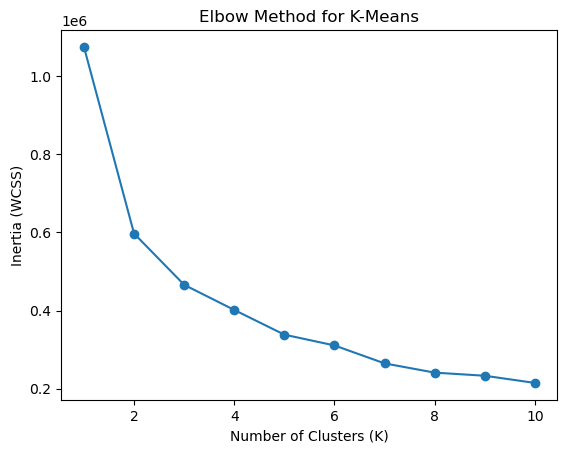

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)  # or the scaled features
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for K-Means")
plt.show()


In [19]:
from sklearn.decomposition import PCA
# Concatenate features
X_full = np.concatenate([X_train, X_test], axis=0)

# Concatenate labels
y_full = np.concatenate([y_train, y_test], axis=0)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_full)


In [30]:
y_full=y_full.reshape(296)

In [31]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_2d)

ari = adjusted_rand_score(y_full, kmeans_labels)
nmi = normalized_mutual_info_score(y_full, kmeans_labels)

print("KMeans (K=2) - ARI:", ari, "NMI:", nmi)


KMeans (K=2) - ARI: 0.46389918480205916 NMI: 0.3667104384472397


c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


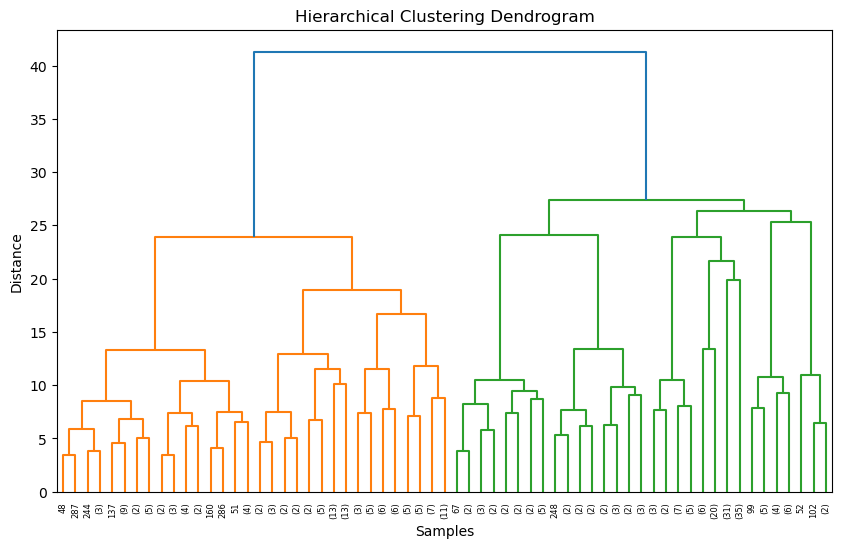

Hierarchical Clustering (K=2) - ARI: 0.376, NMI: 0.291


In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# --- Step 1: Dendrogram ---
plt.figure(figsize=(10, 6))
Z = linkage(X_full, method='ward')   # Ward linkage minimizes variance
dendrogram(Z, truncate_mode="level", p=5)  # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# --- Step 2: Agglomerative Clustering (K=2) ---
hier_clust = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hier = hier_clust.fit_predict(X_2d)

# --- Step 3: Compare with true labels ---
ari_hier = adjusted_rand_score(y_full, labels_hier)
nmi_hier = normalized_mutual_info_score(y_full, labels_hier)

print(f"Hierarchical Clustering (K=2) - ARI: {ari_hier:.3f}, NMI: {nmi_hier:.3f}")


c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


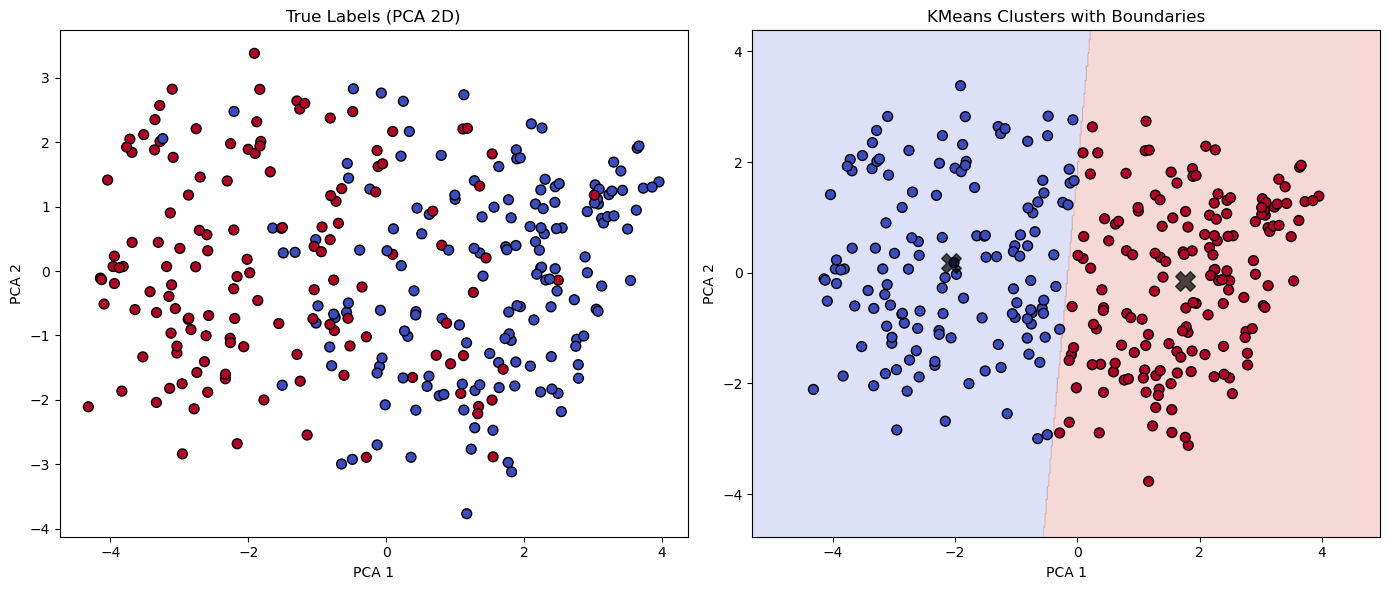

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# --- Step 2: Fit KMeans (K=2 for your case) ---
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_2d)
labels_kmeans = kmeans.labels_

# --- Step 3: Create mesh grid for decision boundary ---
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# cluster centers
centers = kmeans.cluster_centers_
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left: True labels ---
axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=y_full, cmap="coolwarm", s=50, edgecolor="k")
axes[0].set_title("True Labels (PCA 2D)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# --- Right: KMeans clusters + boundaries ---
axes[1].contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_kmeans, cmap="coolwarm", s=50, edgecolor="k")
axes[1].scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.7, marker="X")
axes[1].set_title("KMeans Clusters with Boundaries")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()



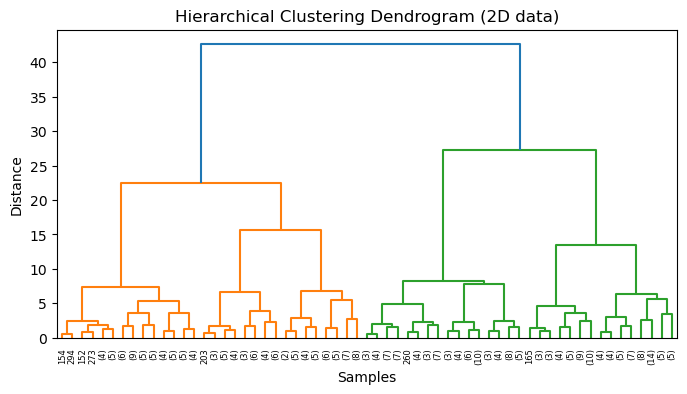

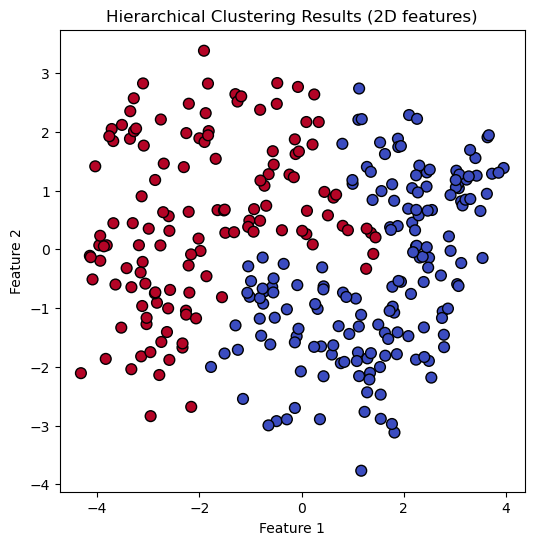

In [34]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# --- Step 1: Dendrogram ---
plt.figure(figsize=(8, 4))
Z = linkage(X_2d, method='ward')
dendrogram(Z, truncate_mode="level", p=5)   # show last 5 merges
plt.title("Hierarchical Clustering Dendrogram (2D data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# --- Step 2: Agglomerative Clustering (K=2 for example) ---
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hier = hier.fit_predict(X_2d)

# --- Step 3: Scatter plot of 2 features colored by cluster ---
plt.figure(figsize=(6, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_hier, cmap="coolwarm", s=60, edgecolor="k")
plt.title("Hierarchical Clustering Results (2D features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

def evaluate_clustering(y_true, cluster_labels):
    # --- Step 1: Align clusters to true labels ---
    cm = confusion_matrix(y_true, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-cm)
    mapping = dict(zip(col_ind, row_ind))
    y_pred_aligned = np.array([mapping[label] for label in cluster_labels])
    
    # --- Step 2: Metrics ---
    acc = accuracy_score(y_true, y_pred_aligned)
    prec = precision_score(y_true, y_pred_aligned)
    rec = recall_score(y_true, y_pred_aligned)
    f1 = f1_score(y_true, y_pred_aligned)
    
    return acc, prec, rec, f1, y_pred_aligned

# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_full)
acc_k, prec_k, rec_k, f1_k, y_kmeans_aligned = evaluate_clustering(y_full, kmeans_labels)
print(f"KMeans -> Accuracy: {acc_k:.3f}, Precision: {prec_k:.3f}, Recall: {rec_k:.3f}, F1: {f1_k:.3f}")

# --- Agglomerative ---
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg.fit_predict(X_full)
acc_a, prec_a, rec_a, f1_a, y_agg_aligned = evaluate_clustering(y_full, agg_labels)
print(f"Agglomerative -> Accuracy: {acc_a:.3f}, Precision: {prec_a:.3f}, Recall: {rec_a:.3f}, F1: {f1_a:.3f}")


KMeans -> Accuracy: 0.838, Precision: 0.816, Recall: 0.839, F1: 0.827
Agglomerative -> Accuracy: 0.764, Precision: 0.703, Recall: 0.847, F1: 0.768


c:\Users\menah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Best performing models

-Unsupervised Learning: KMeans is the stronger performer overall

In [36]:
import joblib

# Save KMeans separately

models_dir = r"C:\Users\menah\Downloads\Heart_Disease_Project\models"
os.makedirs(models_dir, exist_ok=True)  


model_path = os.path.join(models_dir, "KMeans_best_model.pkl")
joblib.dump(kmeans, model_path)
print("Saved KMeans as KMeans_best_model.pkl")

Saved KMeans as KMeans_best_model.pkl
